In [82]:
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pylab as plt

In [83]:
data_filename = 'monthly_rh_means.grib'

# Open the dataset
ds = xr.open_dataset(data_filename)

In [84]:
# Convert from Kelvin to Fahrenheit
ds['d2mF'] = (ds['d2m']-273.15)*9/5 + 32
ds['t2mF'] = (ds['t2m']-273.15)*9/5 + 32

In [85]:
ds = ds.where(ds['latitude'] > -60) # Remove antarctica

In [80]:
#ds = ds.where(ds.time.dt.month.isin([7,8]), drop=True) # Select particular month

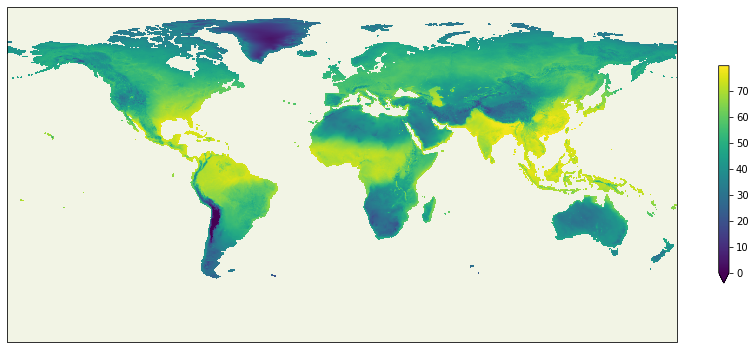

In [81]:
# Average dewpoint temperature
plt.figure(figsize=(15,10))
subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor='#F2F4E5')

ds['d2mF'].sel(time=slice('2012-01', '2021-12')).mean(dim="time").plot( 
      x='longitude', 
      y='latitude',
      vmin = 0,
      subplot_kws=subplot_kws,
      transform=ccrs.PlateCarree(), 
      cmap='viridis', # RdBu
      add_labels=False,
      cbar_kwargs={'shrink': 0.4})

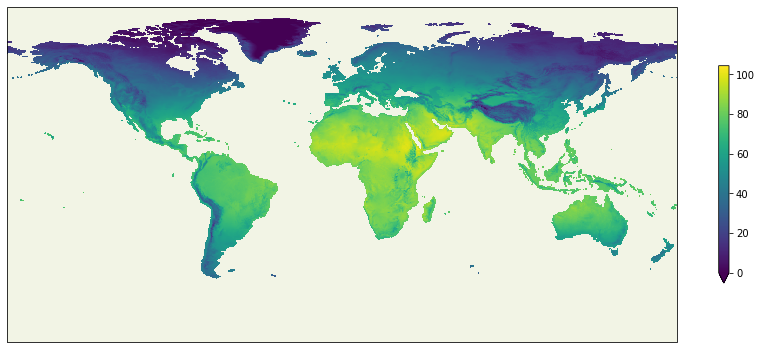

In [37]:
# Average temperature
plt.figure(figsize=(15,10))
subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor='#F2F4E5')

ds['t2mF'].sel(time=slice('2012-01', '2021-12')).mean(dim="time").plot( 
      x='longitude', 
      y='latitude',
      vmin = 0,
      subplot_kws=subplot_kws,
      transform=ccrs.PlateCarree(), 
      cmap='viridis', # RdBu
      add_labels=False,
      cbar_kwargs={'shrink': 0.4})

In [38]:
# Aggregate over time dimension
dsagg = ds.sel(time=slice('2012-01', '2021-12')).mean(dim="time")

In [ ]:
# It's good to shoot for the average, although there might be seasons to some of these stuff (unlikely most of these are close to the tropics)

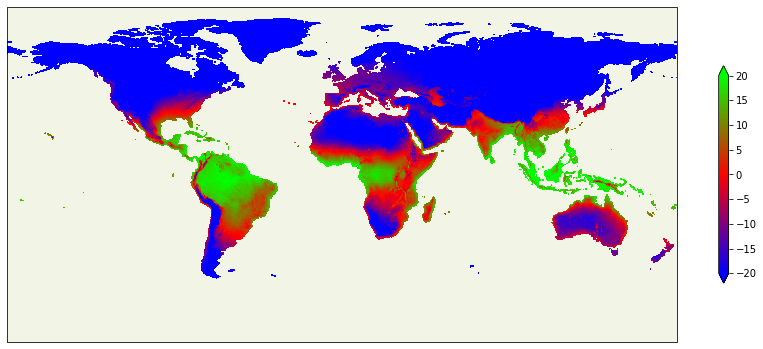

In [39]:
# Average temperature: Red is good here. Too green is too humid, too blue is too dry
plt.figure(figsize=(15,10))
subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor='#F2F4E5')

(dsagg['d2mF'] - 55).plot( 
      x='longitude', 
      y='latitude',
      vmin=-20,
      subplot_kws=subplot_kws,
      transform=ccrs.PlateCarree(), 
      cmap='brg', # RdBu
      add_labels=False,
      cbar_kwargs={'shrink': 0.4})

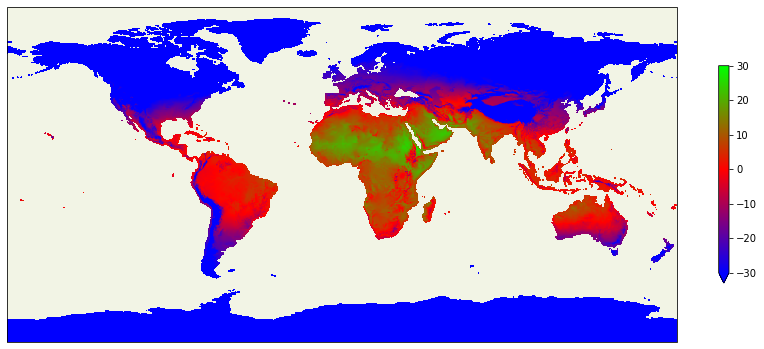

In [21]:
# Average temperature: Red is good here. Green is too hot, blue is too cold
plt.figure(figsize=(15,10))
subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor='#F2F4E5')

(dsagg['t2mF'] - 75).plot( 
      x='longitude', 
      y='latitude',
      vmin=-30,
      subplot_kws=subplot_kws,
      transform=ccrs.PlateCarree(), 
      cmap='brg', # RdBu
      add_labels=False,
      cbar_kwargs={'shrink': 0.4})

In [44]:
# The greater of the distance 
dsagg['distance'] = np.maximum(np.abs(dsagg['d2mF']-55), np.abs(dsagg['t2mF']-75))

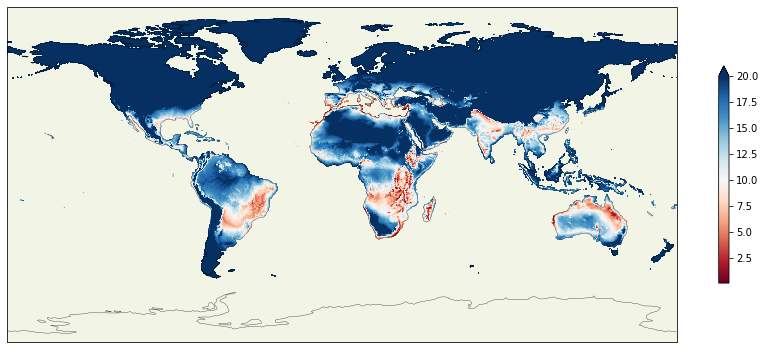

In [51]:
# Average temperature: Red is good here. Blue is no good 
# India and South China and Florida is weird this might be yearly average - but there is a high seasonal variance with moonsoon

plt.figure(figsize=(15,10))
subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor='#F2F4E5')

p = dsagg['distance'].plot( 
      x='longitude', 
      y='latitude',
      vmax=20,
      subplot_kws=subplot_kws,
      transform=ccrs.PlateCarree(), 
      cmap='RdBu', # RdBu
      add_labels=False,
      cbar_kwargs={'shrink': 0.4})
p.axes.coastlines(lw=0.3)

In [86]:
ds['quality_months'] = (np.abs(ds['d2mF']-55) < 10) & (np.abs(ds['t2mF']-75) < 10)

In [97]:
#dsagg2 = ds['quality_months'].sel(time=slice('2012-01', '2021-12')).sum(dim="time")
dsagg2 = ds['quality_months'].where(ds.time.dt.month.isin([7, 8])).sum(dim="time") / float(9*2)
dsagg2 = dsagg2.where(dsagg2 > 0)

In [98]:
ds.time.dt.year.min()

<xarray.DataArray 'year' ()>
array(2012, dtype=int64)
Coordinates:
    number   int32 0
    step     timedelta64[ns] 12:00:00
    surface  float64 0.0

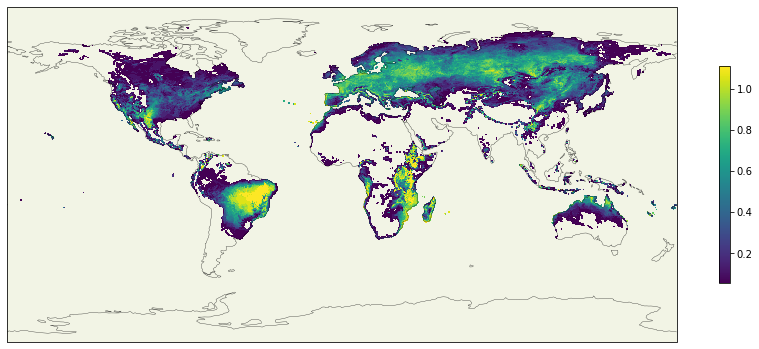

In [99]:
# I suppose the interor of India is great during the dry season
plt.figure(figsize=(15,10))
subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor='#F2F4E5')

p = dsagg2.plot( 
      x='longitude', 
      y='latitude',
      #vmax = 60,
      subplot_kws=subplot_kws,
      transform=ccrs.PlateCarree(), 
      cmap='viridis', # RdBu
      add_labels=False,
      cbar_kwargs={'shrink': 0.4})
p.axes.coastlines(lw=0.3)

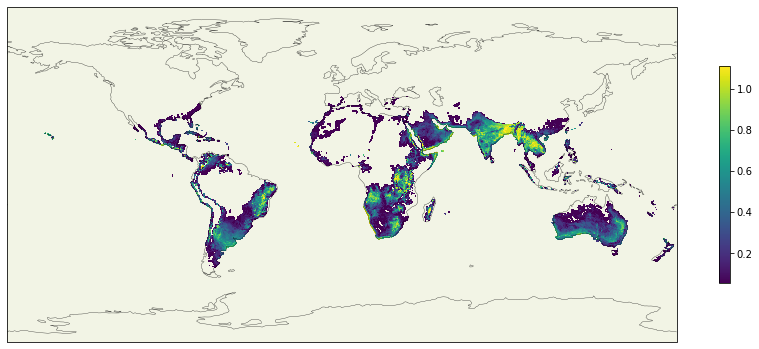

In [96]:
# I suppose the interor of India and mainland south east asia
plt.figure(figsize=(15,10))
subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor='#F2F4E5')

p = dsagg2.plot( 
      x='longitude', 
      y='latitude',
      #vmax = 60,
      subplot_kws=subplot_kws,
      transform=ccrs.PlateCarree(), 
      cmap='viridis', # RdBu
      add_labels=False,
      cbar_kwargs={'shrink': 0.4})
p.axes.coastlines(lw=0.3)

(array([17023., 10012., 15025., 13093., 22991., 35084., 31243., 21970.,
         6593.,  2643.]),
 array([0.        , 0.47874917, 0.95749835, 1.43624752, 1.9149967 ,
        2.39374587, 2.87249505, 3.35124422, 3.82999339, 4.30874257,
        4.78749174]),
 <a list of 10 Patch objects>)

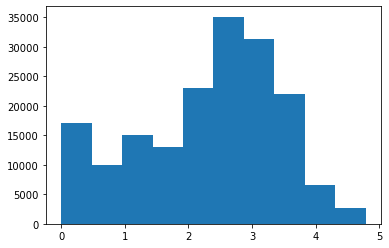

In [68]:
plt.hist(np.log(dsagg2.values.flatten()))

In [ ]:
## 